In [72]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import warnings
pd.set_option('display.float_format', '{:.7f}'.format)
pd.set_option('display.max_columns', 200)
warnings.filterwarnings("ignore")

### State GDP

In [73]:
gdp_state = pd.read_csv('Data/USGDP_1997_2020.csv')

gdp_state = gdp_state[gdp_state.GeoName != 'United States *']
gdp_state = gdp_state.loc[gdp_state['Description'] == 'All industry total']
gdp_state = gdp_state.drop(['IndustryClassification', 'Description', 'LineCode', 'TableName'], axis=1).reset_index(drop=True)
gdp_state = gdp_state.iloc[:-8, :]
for year in range(1997, 2021):
    gdp_state[str(year)] = pd.to_numeric(gdp_state[str(year)])

# toggle info views
# gdp_state.head()
# gdp_state.info()
# gdp_state.isna().sum()

# gdp_state.head()

### Airline Flights DF

In [74]:
airline_flights = pd.read_csv('Data/US Airline Flight Routes and Fares 1993-2024 2.csv')
airline_flights.sort_values(by=['Year', 'quarter'], ascending=[True, True], inplace=True)
# airline_flights.shape

# airline_flights.head()

In [75]:
airline_flights.rename(columns={
    'quarter': 'Quarter',
    'city1': 'Origin_City_Name',
    'city2': 'Destination_City_Name',
    'airportid_1': 'Origin_Airport_ID',
    'airportid_2': 'Destination_Airport_ID',
    'airport_1': 'Origin_Airport_Code',
    'airport_2': 'Destination_Airport_Code',
    'nsmiles': 'Distance_Between_Airports',
    'passengers': 'Num_Passengers',
    'fare': 'Average_Fare',
}, inplace=True)

In [76]:
airline_flights = airline_flights[[
                  #  'tbl', 
                  'Year', 'Quarter', 
                  #   'citymarketid_1', 'citymarketid_2',
                  'Origin_City_Name', 'Destination_City_Name', 'Origin_Airport_ID', 'Destination_Airport_ID', 'Origin_Airport_Code',
                  'Destination_Airport_Code', 'Distance_Between_Airports', 'Num_Passengers', 'Average_Fare',
                  #   'carrier_lg', 'large_ms', 'fare_lg', 'carrier_low', 'lf_ms', 'fare_low',
                  'Geocoded_City1', 'Geocoded_City2', 
                  #   'tbl1apk'
                    ]].copy()

In [77]:
airline_flights = airline_flights[~airline_flights['Year'].between(1993, 1996)]

# Toggle to remove Metropolitan area
airline_flights['Origin_City_Name'] = airline_flights['Origin_City_Name'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)
airline_flights['Destination_City_Name'] = airline_flights['Destination_City_Name'].str.replace(r'\s*\(Metropolitan Area\)', '', regex=True)

airline_flights[['Destination_City', 'Destination_State']] = airline_flights['Destination_City_Name'].str.split(", ", expand=True)
airline_flights[['Origin_City', 'Origin_State']] = airline_flights['Origin_City_Name'].str.split(", ", expand=True)

# airline_flights.head()

In [78]:
state_mapping = {
    'AL': 'Alabama',
    'AK': 'Alaska',
    'AZ': 'Arizona',
    'AR': 'Arkansas',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'IA': 'Iowa',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MS': 'Mississippi',
    'MO': 'Missouri',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming'
}

airline_flights = airline_flights.replace({
    'Destination_State': state_mapping,
    'Origin_State': state_mapping
    })

In [79]:
airline_flights = airline_flights.dropna()

# airline_flights.head()

<Axes: ylabel='Destination_State'>

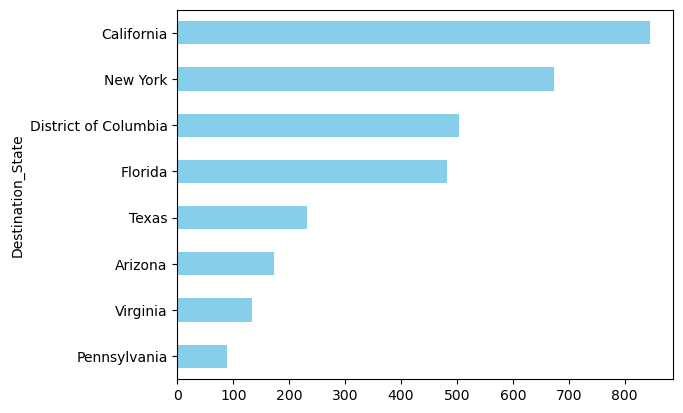

In [80]:
flights_2018 = airline_flights[airline_flights['Year'] == 2018]

destination_counts = flights_2018['Destination_State'].value_counts()
destination_counts_filtered = destination_counts[destination_counts > 80].sort_values(ascending=True)

destination_counts_filtered.plot(kind='barh', color='skyblue')

# plt.xlabel('Number of Flights')
# plt.ylabel('Destination State')
# plt.title('Number of Flights to Each State in 2018 (Min 80)')
# plt.grid(True, alpha= 0.4)

# plt.show()

In [ ]:
flights_2018 = airline_flights[airline_flights['Year'] == 2018]

origin_counts = flights_2018['Origin_State'].value_counts()
origin_counts_filtered = origin_counts[origin_counts > 80].sort_values(ascending=True)


origin_counts_filtered.plot(kind='barh', color='lightgreen')

# plt.xlabel('Number of Flights')
# plt.ylabel('Origin City')
# plt.title('Number of Flights from Each State in 2018 (Min 80)')
# plt.grid(True, alpha= 0.4)

# plt.show()

In [ ]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 8))
destination_counts_filtered.plot(kind='barh', ax=axes[0], color='skyblue')
axes[0].set_xlabel('Number of Flights')
axes[0].set_ylabel('Destination State')
axes[0].set_title('Number of Flights to Each State in 2018 (Min 80)')
axes[0].grid(True, alpha=0.5)


origin_counts_filtered.plot(kind='barh', ax=axes[1], color='lightgreen')
axes[1].set_xlabel('Number of Flights')
axes[1].set_ylabel('Origin State')
axes[1].set_title('Number of Flights from Each State in 2018 (Min 80)')
axes[1].grid(True, alpha=0.5)

# plt.tight_layout()
# plt.show()

### Combining GDP and Flights

In [83]:
flights_2018 = airline_flights.loc[airline_flights.Year == 2018]

In [84]:
state_counts_2018_des = pd.DataFrame(flights_2018['Destination_State'].value_counts()).reset_index()

In [85]:
gdp_state_2018_des = gdp_state[['GeoName','2018']]
gdp_state_2018_des.rename(columns={
    'GeoName': 'Destination_State',
}, inplace=True)

In [86]:
# This is a dataframe that should be graphed
gdp_incoming_flights = pd.merge(state_counts_2018_des, gdp_state_2018_des, on = "Destination_State")
gdp_incoming_flights 

,Destination_State,count,2018
0,California,845,2975083.0
1,New York,673,1705010.2
2,District of Columbia,504,138773.5
3,Florida,482,1050298.4
4,Texas,232,1795635.1
5,Arizona,173,350718.3
6,Virginia,133,533510.4
7,Pennsylvania,88,778374.6
8,Washington,77,575416.7
9,Missouri,76,317949.1


In [ ]:
state_counts_2018_og = pd.DataFrame(flights_2018['Origin_State'].value_counts()).reset_index()
gdp_state_2018_og = gdp_state[['GeoName','2018']]
gdp_state_2018_og.rename(columns={
    'GeoName': 'Origin_State',
}, inplace=True)
gdp_outgoing_flights = pd.merge(state_counts_2018_og, gdp_state_2018_og, on = "Origin_State")
gdp_outgoing_flights

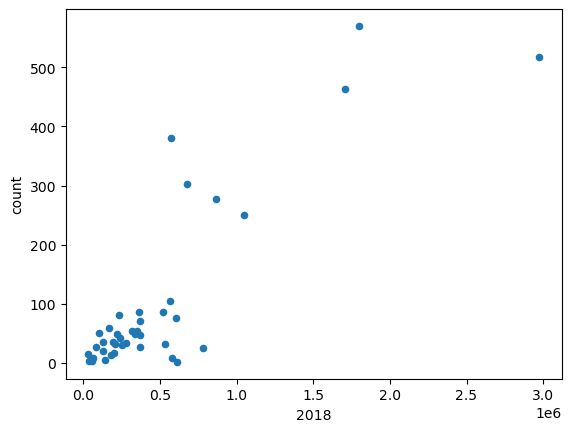

In [91]:
# destination_counts = flights_2018['Destination_State'].value_counts()
# destination_counts_filtered = destination_counts[destination_counts > 80].sort_values(ascending=True)

# destination_counts_filtered.plot(kind='barh', color='skyblue')

# plt.xlabel('Number of Flights')
# plt.ylabel('Destination State')
# plt.title('Number of Flights to Each State in 2018 (Min 80)')
# plt.grid(True, alpha= 0.4)

# plt.show()

gdp_outgoing_flights.plot.scatter(x="2018", y="count")
plt.show()


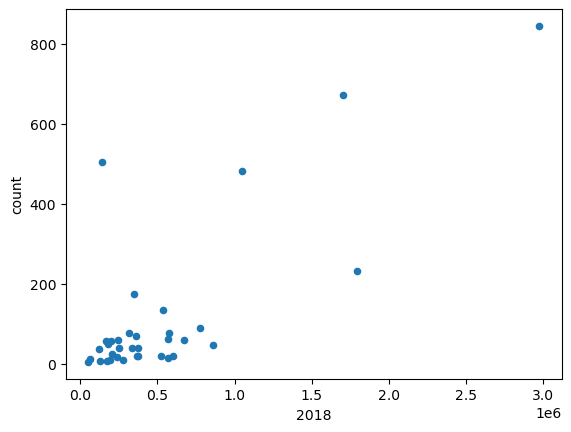

In [92]:
gdp_incoming_flights.plot.scatter(x="2018", y="count")
plt.show()

## Geolocation Airports